**Business Objective**: Telephonic marketing campaigns are expensive due to operational call center costs. The objective of this analysis is to examine customer demographics and campaign-related variables to identify patterns influencing term deposit subscription and provide data-driven marketing recommendations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv('/content/banking_data.csv')

**Dataset Overview**

This dataset contains information related to direct marketing campaigns conducted by a Portuguese banking institution between May 2008 and November 2010. The campaigns were primarily executed through telephonic outreach.

The dataset consists of:

45,211 observations

18 features

Target variable: y which indicates whether the client subscribed to a term deposit

**Feature Categories**

The dataset includes both numerical and categorical variables:

Numerical Variables:
age,
balance,
day,
duration,
campaign,
pdays,
previous

Categorical Variables:
job,
marital,
education,
default,
housing,
loan,
contact,
month,
poutcome,
y

The variable y represents whether the client subscribed to a term deposit:
yes → Client subscribed
no → Client did not subscribe

In [3]:
data.shape
data.head()
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45216 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45216 non-null  int64 
 1   job             45216 non-null  object
 2   marital         45213 non-null  object
 3   marital_status  45213 non-null  object
 4   education       45213 non-null  object
 5   default         45216 non-null  object
 6   balance         45216 non-null  int64 
 7   housing         45216 non-null  object
 8   loan            45216 non-null  object
 9   contact         45216 non-null  object
 10  day             45216 non-null  int64 
 11  month           45216 non-null  object
 12  day_month       45216 non-null  object
 13  duration        45216 non-null  int64 
 14  campaign        45216 non-null  int64 
 15  pdays           45216 non-null  int64 
 16  previous        45216 non-null  int64 
 17  poutcome        45216 non-null  object
 18  y     

,0
age,0
job,0
marital,3
marital_status,3
education,3
default,0
balance,0
housing,0
loan,0
contact,0


**Initial Data Inspection**

The initial inspection of the dataset provided insights into the structure and quality of the data. Using shape(), the dataset was found to contain 45,211 rows and 18 columns.

The info() function helped identify the data types of each variable, distinguishing between numerical and categorical features. It also revealed the presence of any missing or null values.

Additionally, head() was used to preview the first few records, allowing a better understanding of how the data is structured and stored.

Overall, the dataset appears well-structured with a combination of demographic, financial, and campaign-related attributes.

A check for missing values indicated that there were no significant null values requiring immediate data cleaning.

In [4]:
data['y'].value_counts()
#counts number of yes and no gives a ratio


,count
y,
no,39922
yes,5294


In [5]:
data['y'].value_counts(normalize=True)
#gives a ratio

,proportion
y,
no,0.882918
yes,0.117082


In [6]:
#as we have <5% missing values, it's safe to drop it
data.dropna(subset=['marital', 'education', 'marital_status'], inplace=True)
data.isnull().sum()

,0
age,0
job,0
marital,0
marital_status,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0


**Data Cleaning & Preparation**

Before conducting exploratory analysis, the dataset was inspected for data quality issues such as missing values, incorrect data types, and duplicate records.

The dataset contains 45,211 records and 18 features.

No significant missing values were observed.

Data types were found to be appropriate for both numerical and categorical variables.

No major structural inconsistencies were identified.

Since the dataset was relatively clean, minimal preprocessing was required before proceeding to exploratory data analysis.

In [7]:
data['age'].describe()

,age
count,45210.000000
mean,40.938465
std,10.619311
min,18.000000
25%,33.000000
50%,39.000000
75%,48.000000
max,95.000000


(array([4.600e+01, 1.280e+02, 1.290e+02, 5.040e+02, 5.270e+02, 1.714e+03,
        1.038e+03, 2.942e+03, 1.996e+03, 4.056e+03, 1.930e+03, 3.700e+03,
        3.162e+03, 1.487e+03, 2.646e+03, 1.242e+03, 2.297e+03, 1.216e+03,
        2.263e+03, 9.970e+02, 1.933e+03, 9.360e+02, 1.803e+03, 8.110e+02,
        1.584e+03, 1.567e+03, 7.700e+02, 7.430e+02, 8.000e+01, 1.510e+02,
        5.900e+01, 1.170e+02, 3.700e+01, 1.110e+02, 5.500e+01, 9.700e+01,
        3.700e+01, 7.000e+01, 7.400e+01, 2.500e+01, 4.800e+01, 1.900e+01,
        3.100e+01, 5.000e+00, 1.300e+01, 2.000e+00, 5.000e+00, 0.000e+00,
        4.000e+00, 3.000e+00]),
 array([18.  , 19.54, 21.08, 22.62, 24.16, 25.7 , 27.24, 28.78, 30.32,
        31.86, 33.4 , 34.94, 36.48, 38.02, 39.56, 41.1 , 42.64, 44.18,
        45.72, 47.26, 48.8 , 50.34, 51.88, 53.42, 54.96, 56.5 , 58.04,
        59.58, 61.12, 62.66, 64.2 , 65.74, 67.28, 68.82, 70.36, 71.9 ,
        73.44, 74.98, 76.52, 78.06, 79.6 , 81.14, 82.68, 84.22, 85.76,
        87.3 , 88.84,

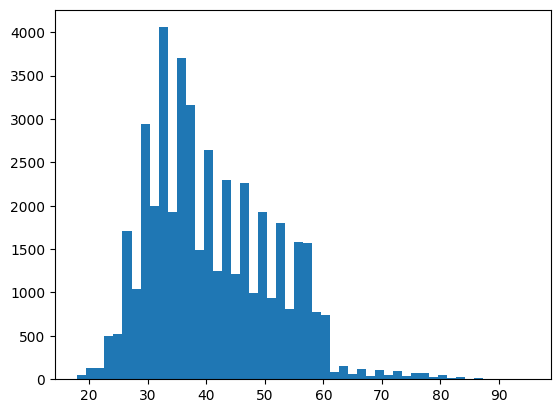

In [8]:
plt.hist(data['age'], bins=50)

**Customer Age Distribution**

Understanding the age distribution of clients helps identify the primary demographic segment targeted during the marketing campaign.

The average age of clients is approximately 40.9 years, indicating that middle-aged individuals form a significant portion of the dataset. The majority of clients fall within the 30–40 age group, suggesting that working professionals represent a dominant customer segment.

The distribution appears slightly right-skewed, with a small number of older clients above 80 years acting as outliers. However, these extreme values do not significantly impact the overall distribution.

From a business perspective, this suggests that marketing efforts are largely concentrated on economically active individuals, which aligns with the typical profile of term deposit investors.

In [9]:
data['job'].value_counts()

,count
job,
blue-collar,9731
management,9458
technician,7597
admin.,5171
services,4154
retired,2266
self-employed,1579
entrepreneur,1487
unemployed,1303


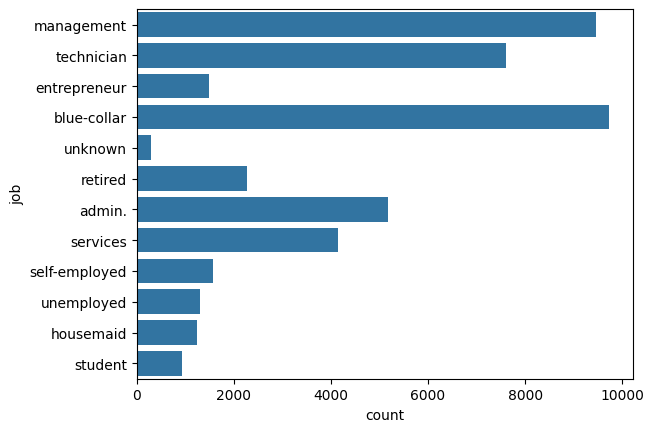

In [10]:
import seaborn as sns
sns.countplot(y='job', data=data)
plt.show()

**Job Distribution Analysis**

Analyzing the occupational background of clients provides insight into the dominant customer segments targeted during the marketing campaigns.

The data indicates that blue-collar workers form the largest segment of the client base. This suggests that a significant portion of the bank’s outreach efforts are directed toward working-class individuals.

The second largest segment consists of management professionals, indicating that mid-to-high income groups are also actively targeted for term deposit offerings.

On the other hand, students represent one of the smallest segments, which is expected given their relatively lower earning capacity and investment potential.

Additionally, only 0.6% of clients have unknown job information, indicating that the dataset maintains a high level of completeness and reliability in occupational classification.

From a business standpoint, understanding occupational distribution helps identify which employment segments dominate the customer base and may influence subscription behavior.

In [11]:
data['marital'].value_counts()

,count
marital,
married,27216
single,12787
divorced,5207


**Marital Status Distribution**

Understanding the marital composition of clients helps identify the dominant household segment targeted during the campaign.

The analysis shows that married clients constitute approximately 60% of the total customer base, making them the largest segment. This suggests that the marketing efforts are primarily reaching individuals with established family structures and potentially stable financial responsibilities.

Single clients account for around 28%, representing a significant but smaller portion of the dataset. This group may have different investment behavior compared to married individuals.

Divorced clients represent approximately 12% of the total population**, forming the smallest marital segment.

From a business perspective, married individuals may have a higher likelihood of investing in term deposits due to financial planning responsibilities, long-term savings goals, and household stability. This insight could help tailor targeted marketing strategies based on marital demographics.

In [12]:
data['education'].value_counts()

,count
education,
secondary,23201
tertiary,13301
primary,6851
unknown,1857


**Education Level Distribution**

Education level plays an important role in understanding financial awareness and investment behavior among clients.

The analysis reveals that 51% of clients have secondary education, making it the largest educational segment in the dataset. This indicates that a significant portion of the bank’s customer base consists of moderately educated individuals.

Approximately 29% of clients have tertiary education, representing individuals with higher academic qualifications. These clients may demonstrate greater financial literacy and awareness of investment opportunities such as term deposits.

Meanwhile, 15% of clients have primary education, and only 4% fall under the unknown category, suggesting that the dataset maintains good informational completeness.

Overall, the majority of customers possess at least a secondary level of education. From a business perspective, this suggests that marketing communication strategies can be moderately sophisticated, as most clients likely have the capacity to understand financial products and investment benefits.

In [13]:
data['default'].value_counts()
data['default'].value_counts(normalize=True)

,proportion
default,
no,0.981973
yes,0.018027


**Credit Default Analysis**

Evaluating the credit default status of clients helps assess the overall financial stability of the customer base.

The analysis shows that 98% of clients do not have credit in default, while only 2% of clients have defaulted credit. This indicates that the vast majority of customers in the dataset are financially stable.

From a business perspective, this suggests that the bank’s marketing campaigns are primarily targeting low-risk individuals. Clients without credit default are generally more financially reliable and may be more likely to invest in fixed-term financial products such as term deposits.

The small proportion of clients with defaulted credit represents a higher-risk segment and may require different financial product strategies.

In [14]:
data['balance'].describe()

,balance
count,45210.000000
mean,1362.333024
std,3044.781647
min,-8019.000000
25%,72.000000
50%,448.500000
75%,1428.000000
max,102127.000000


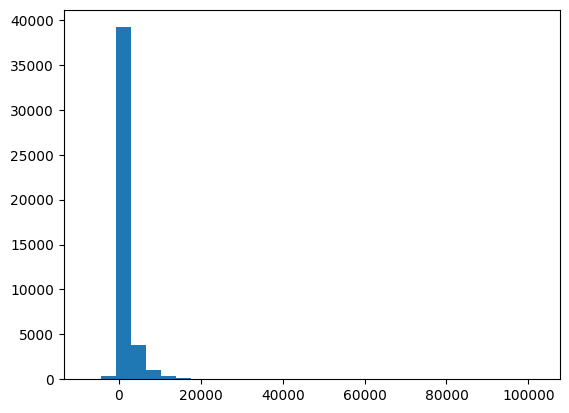

In [15]:
plt.hist(data['balance'], bins=30)
plt.show()

**Average Yearly Balance Distribution**

Analyzing the distribution of average yearly account balances provides insight into the financial capacity of clients targeted during the campaign.

The balance distribution is observed to be highly right-skewed, indicating that while most clients maintain relatively low to moderate account balances, a small proportion of clients hold significantly higher balances.

These high-value accounts create a long right tail in the distribution. Additionally, the mean balance is higher than the median, which further confirms the presence of outliers and extreme values.

From a business perspective, this suggests that the bank’s customer base primarily consists of average-income individuals, with a smaller segment of high-net-worth clients. This distinction is important when designing targeted marketing strategies, as investment behavior may differ significantly between moderate and high-balance clients.

In [16]:
data['housing'].value_counts()
data['housing'].value_counts(normalize=True)

,proportion
housing,
yes,0.55585
no,0.44415


**Housing Loan Distribution**

Analyzing housing loan status helps understand the financial commitments of clients and their potential capacity for additional investments.

The data shows that approximately 55.6% of clients currently have a housing loan, while 44.4% do not have any housing loan obligations. This indicates that a significant portion of the customer base is actively servicing long-term financial commitments.

From a business standpoint, clients with housing loans may exhibit different investment behavior compared to those without loans. While loan obligations could limit disposable income, such clients may also demonstrate structured financial planning habits, making them potential candidates for long-term savings instruments like term deposits.

Understanding this distribution allows the bank to tailor its marketing approach based on clients' existing financial commitments.

In [17]:
data['loan'].value_counts()
data['loan'].value_counts(normalize=True)

,proportion
loan,
no,0.83977
yes,0.16023


**Personal Loan Distribution**

Examining personal loan status provides additional insight into the financial obligations and risk profile of the bank’s clients.

The analysis indicates that 16% of clients currently have a personal loan, while a substantial 84% do not have any personal loan commitments. This suggests that the majority of the customer base carries relatively limited short-term debt obligations.

From a business perspective, clients without personal loans may have greater disposable income available for savings and investment products such as term deposits. Conversely, clients with active personal loans may demonstrate existing credit engagement, which could influence their financial decision-making behavior.

Understanding personal loan distribution enables more refined customer segmentation for targeted marketing strategies.

In [18]:
data['contact'].value_counts()
data['contact'].value_counts(normalize= True)

,proportion
contact,
cellular,0.647821
unknown,0.287989
telephone,0.064189


**Communication Type Analysis**

Understanding the communication channels used during the marketing campaign helps evaluate outreach effectiveness and channel preference.

The data indicates that 64.8% of clients were contacted via cellular communication, making it the dominant outreach channel. This suggests that mobile-based telemarketing plays a primary role in the bank’s campaign strategy.

Approximately 28.8% of records fall under the “unknown” category, which may indicate incomplete channel recording or earlier campaign structures where communication type was not properly documented.

Only 6.4% of clients were contacted via traditional telephone lines, highlighting a relatively limited reliance on landline communication.

From a strategic standpoint, the strong dominance of cellular communication reflects modern outreach trends and suggests that mobile-based engagement is the most effective and scalable channel for customer contact.

Text(0.5, 1.0, 'Distribution of Last Contact Day')

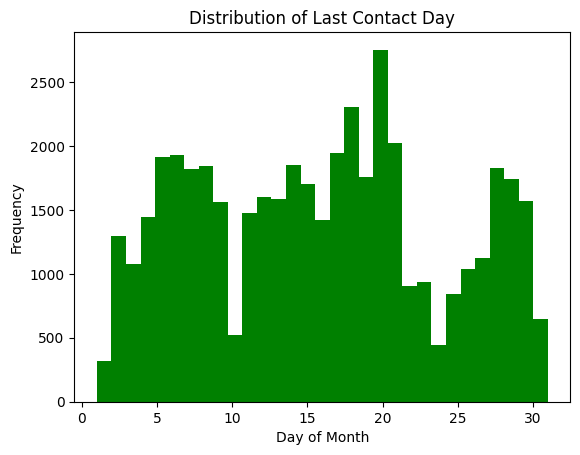

In [19]:
data['day'].describe()
plt.hist(data['day'], bins=31, color='green')
plt.xlabel('Day of Month')
plt.ylabel('Frequency')
plt.title('Distribution of Last Contact Day')

**Last Contact Day Distribution**

Analyzing the distribution of the last contact day helps determine whether marketing efforts were concentrated on specific days of the month.

The data shows that the last contact day ranges from 1 to 31, covering the entire monthly cycle. The distribution appears to be fairly evenly spread across the month, with no strong dominance of a particular day.

This suggests that outreach activities were not limited to specific dates but were instead distributed consistently throughout the month.

From a business perspective, this indicates an operationally balanced campaign approach rather than a time-specific push strategy. It may also imply that the timing of contact (in terms of day of the month) does not appear to be a primary influencing factor in subscription behavior.

In [20]:
data['month'].value_counts()

,count
month,
may,13766
jul,6895
aug,6247
jun,5341
nov,3972
apr,2932
feb,2649
jan,1403
oct,735


**Last Contact Month Analysis**

Examining the distribution of contacts across months helps identify seasonal patterns in the bank’s marketing campaigns.

The analysis indicates that May recorded the highest number of client contacts, while December had the lowest level of outreach activity.

This pattern may reflect strategic campaign planning, where marketing efforts are intensified during certain periods of the year. The lower activity in December could be influenced by holiday seasons, reduced operational days, or lower customer responsiveness during year-end periods.

From a business perspective, understanding monthly engagement patterns allows the bank to evaluate whether campaign timing influences subscription rates and whether resources are being allocated optimally across the year.

In [21]:
data['duration'].describe()

,duration
count,45210.000000
mean,258.155342
std,257.522333
min,0.000000
25%,103.000000
50%,180.000000
75%,319.000000
max,4918.000000


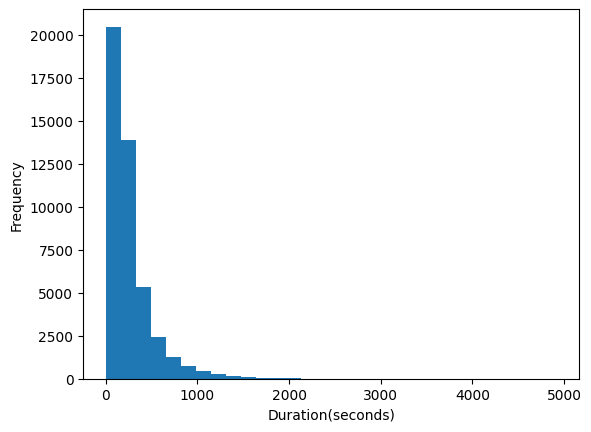

In [22]:
plt.hist(data['duration'], bins=30)
plt.xlabel('Duration(seconds)')
plt.ylabel('Frequency')
plt.show()

**Call Duration Analysis**

Call duration is a critical variable in understanding customer engagement during telephonic marketing campaigns.

The analysis shows that the average call duration is approximately 258 seconds. However, the distribution is highly right-skewed, indicating that most calls are relatively short, while a small number of calls extend significantly longer.

The presence of a long right tail suggests that extended conversations occur with a limited group of clients, potentially reflecting higher engagement levels.

From a business perspective, call duration may serve as an indicator of customer interest. Longer conversations could imply stronger engagement and potentially a higher likelihood of subscription. This insight highlights the importance of effective communication strategies during telemarketing interactions.

In [23]:
data['campaign'].describe()

,campaign
count,45210.000000
mean,2.763791
std,3.098059
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,63.000000


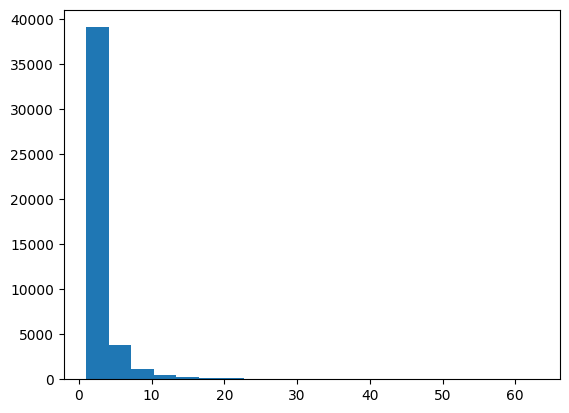

In [24]:
plt.hist(data['campaign'], bins=20)
plt.show()

**Campaign Contact Frequency Analysis**

The variable campaign represents the number of contacts performed during the current marketing campaign for each client.

The distribution is observed to be highly right-skewed, indicating that most clients were contacted only a few times. However, a small group of clients experienced a significantly higher number of follow-ups, with some being contacted up to 63 times.

This suggests that while the majority of customers received limited outreach, certain clients were subject to repeated follow-up attempts.

From a business perspective, excessive contact attempts may increase operational costs without necessarily improving conversion rates. Identifying an optimal number of follow-ups could help improve campaign efficiency and reduce unnecessary resource allocation.

In [25]:
data['pdays'].describe()

,pdays
count,45210.000000
mean,40.187879
std,100.112791
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,871.000000


In [26]:
data['pdays'].value_counts().head()
#A huge number of values = -1,That means: Most clients were never contacted before this campaign.

,count
pdays,
-1,36954
182,167
92,147
183,126
91,126


In [27]:
(data['pdays'] == -1).mean()

np.float64(0.8173855341738553)

**Previous Contact Timing (pdays) Analysis**

The variable pdays represents the number of days since a client was last contacted in a previous campaign.

A significant proportion of clients have pdays = -1, which indicates that they were not contacted in any previous campaign. Approximately 82% of clients fall into this category, showing that the majority of the customer base had no prior engagement history.

Only a small subset of clients had been contacted before, meaning that most outreach efforts in this dataset were directed toward first-time contacts.

From a business standpoint, this suggests that the campaign largely targeted new or previously unengaged customers. Further analysis could help determine whether prior contact history positively influences subscription probability.

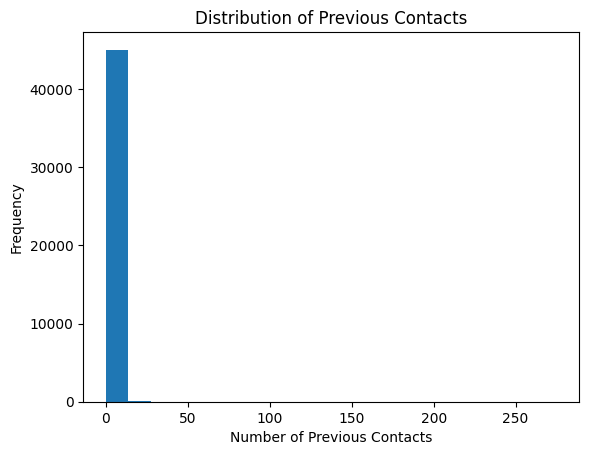

In [28]:
data['previous'].describe()
plt.hist(data['previous'], bins=20)
plt.xlabel("Number of Previous Contacts")
plt.ylabel("Frequency")
plt.title("Distribution of Previous Contacts")
plt.show()

**Previous Campaign Contacts (previous) Analysis**

The variable previous indicates the number of contacts performed before the current campaign.

The distribution is highly skewed toward 0, meaning that the majority of clients had no prior contact history before the current campaign.

Only a small proportion of clients were contacted in earlier campaigns.

This aligns with the pdays analysis, confirming that most customers in this dataset were approached without prior engagement history.

From a business perspective, this suggests that the campaign strategy primarily focused on new or previously uncontacted clients. Evaluating how prior contact influences subscription rates could provide valuable strategic insights.

In [29]:
data['poutcome'].value_counts(normalize=True)

,proportion
poutcome,
unknown,0.817496
failure,0.108383
other,0.040655
success,0.033466


**Previous Campaign Outcome (poutcome) Analysis**

The variable poutcome represents the outcome of the previous marketing campaign for each client.

The analysis shows that approximately 81.7% of clients have "unknown" as their previous campaign outcome. This strongly aligns with earlier findings from pdays and previous, which indicated that the majority of clients were not contacted in prior campaigns.

Only a small proportion of clients experienced explicit outcomes such as "success" or "failure", and a very limited number had successful interactions in earlier campaigns.

From a business perspective, this suggests that historical campaign performance data is limited for most customers. However, for the subset of clients with a previous "success," further analysis could reveal whether prior positive engagement significantly increases the likelihood of future subscription.

In [30]:
data['y'].value_counts()
data['y'].value_counts(normalize=True)


,proportion
y,
no,0.882924
yes,0.117076


**Subscription Outcome Analysis (y)**

The target variable y indicates whether a client subscribed to the term deposit.

The analysis reveals that approximately 88% of clients did not subscribe, while only about 12% of clients subscribed.

This clearly shows that the dataset is highly imbalanced, with a significantly smaller proportion of positive outcomes (subscribers) compared to non-subscribers.

From a business perspective, this indicates:

The campaign has a relatively low overall conversion rate.

Most outreach efforts do not result in subscription.

Predictive modeling will need to handle class imbalance carefully to avoid bias toward the majority class.

This imbalance is critical to consider when building machine learning models, as accuracy alone would not be an appropriate performance metric.

In [31]:
#step1- convert it to numeric data
data['y_binary']= data['y'].map({'no':0, 'yes':1})

In [32]:
#step2
#Correlation matrix: Only works for numeric variables,Only captures linear relationships,Does NOT work well for categorical variables
data.corr(numeric_only=True)['y_binary'].sort_values(ascending=False)

,y_binary
y_binary,1.000000
duration,0.394472
pdays,0.103813
previous,0.093628
balance,0.052844
age,0.025718
day,-0.028264
campaign,-0.073277


**Overall Findings**

This exploratory data analysis examined customer demographics, financial attributes, and campaign-related variables to identify factors influencing subscription to a term deposit.

The dataset reveals that:

The campaign conversion rate is relatively low, with only 12% of clients subscribing, indicating a highly imbalanced target variable.

Most clients were first-time contacts, as reflected by high proportions of previous = 0, pdays = -1, and poutcome = unknown.

Customer demographics such as education level, job type, and housing loan status show noticeable differences in subscription likelihood.

Call duration has the strongest relationship with subscription; however, it cannot be used for prediction prior to the call due to data leakage concerns.

In [33]:
#pdays vs subscribe
pd.crosstab(data['poutcome'], data['y'], normalize='index')

y,no,yes
poutcome,,
failure,0.873673,0.126327
other,0.832971,0.167029
success,0.352280,0.647720
unknown,0.908358,0.091642


Observation:
- Clients whose previous campaign outcome was "success" have a subscription rate of approximately 64.8%.
- This is significantly higher than the overall subscription rate (~12%).
- This indicates that previous campaign success is a strong predictor of future subscription.


In [34]:
#balance vs subscription
data.groupby('y')['balance'].mean()

,balance
y,
no,1303.743443
yes,1804.184583


Observation:
- The average account balance of clients who subscribed is higher than that of non-subscribers.
- This suggests that clients with higher balances are more likely to invest in term deposits.
- Financial stability appears to positively influence subscription likelihood.


In [35]:
#campaign vs subscription
data.groupby('y')['campaign'].mean()

,campaign
y,
no,2.846456
yes,2.140374


Observation:
- The average number of contacts during the campaign is slightly higher for non-subscribers.
- However, the difference is minimal (approximately 0.7 contacts).
- This suggests that increasing the number of calls does not significantly improve subscription likelihood.

In [36]:
#age vs subscription
data.groupby('y')['age'].mean()

,age
y,
no,40.839016
yes,41.688456


Observation:
- The average age of subscribers is slightly higher than non-subscribers.
- However, the difference is minimal (less than 1 year).
- This suggests that age alone is not a strong predictor of term deposit subscription.


In [37]:
#pout vs subscription
pd.crosstab(data['poutcome'], data['y'], normalize='index')

y,no,yes
poutcome,,
failure,0.873673,0.126327
other,0.832971,0.167029
success,0.352280,0.647720
unknown,0.908358,0.091642


Observation:
- Clients with a previous campaign outcome of 'success' show the highest subscription rate.
- This indicates a strong positive relationship between past success and future subscription.
- Previous campaign outcome is one of the strongest predictors of term deposit subscription.

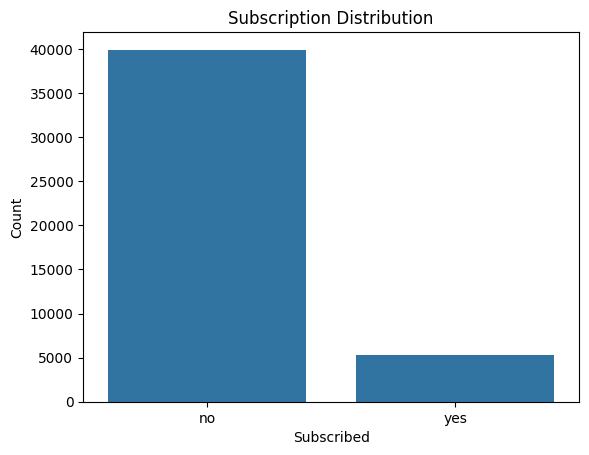

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='y', data=data)
plt.title("Subscription Distribution")
plt.xlabel("Subscribed")
plt.ylabel("Count")
plt.show()


**Subscription Distribution Visualization**

The above count plot illustrates the distribution of the target variable (y), which represents whether a client subscribed to a term deposit.

It is clearly visible that the majority of clients fall under the “no” category, while a much smaller proportion belongs to the “yes” category. This confirms that the dataset is highly imbalanced, with approximately 88% non-subscribers and only 12% subscribers.

This imbalance has important analytical implications:

Predictive models trained on this dataset may become biased toward predicting the majority class.

Accuracy alone would not be an appropriate evaluation metric.

Metrics such as precision, recall, F1-score, and ROC-AUC should be considered for proper model evaluation.

From a business perspective, the low subscription rate suggests that while the campaign reaches a large number of clients, conversion efficiency remains limited. This highlights the need for improved customer targeting and segmentation strategies.

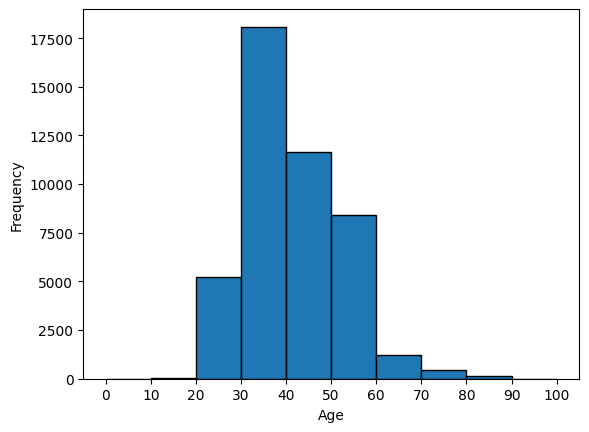

In [39]:
bins= np.arange(0,101, 10)
plt.hist(data.age, bins=bins, edgecolor= 'black' )
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(bins)
plt.show()

**Age Distribution (Binned Analysis)**

The above histogram presents the age distribution grouped into 10-year intervals for better interpretability.

The majority of clients fall within the 30–50 age range, indicating that middle-aged individuals form the core customer segment targeted in the campaign. The highest concentration appears in the 30–40 age group, followed closely by the 40–50 segment.

The distribution is slightly right-skewed, with fewer clients in older age groups (60+), and a very small number above 80 years. This creates a gradual decline in frequency as age increases.

From a business perspective, this suggests that the bank primarily focuses on economically active individuals who are likely to have stable income sources and potential savings capacity. Younger and middle-aged professionals represent the dominant market segment for term deposit products.